# LA Restaurants Research

## The purpose of this analysis is to do a market research on restaurants in LA.

### Tables Of Contents <a class="anchor" id="table_of_contents"></a>

* [Exploring The Dataset](#chapter1)
* [Investigate the proportions of the various types of establishments](#chapter2)
* [Investigate the proportions of chain and nonchain establishments](#chapter3)
* [Which type of establishment is typically a chain?](#chapter4)
* [What characterizes chains](#chapter5)
* [Determine the average number of seats for each type of restaurant](#chapter6)
* [Put the data on street names from the address column in a separate column](#chapter7)
* [Plot a graph of the top ten streets by number of restaurants](#chapter8)
* [Find the number of streets that only have one restaurant](#chapter9)
* [For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?](#chapter10) 
* [Final Conclusion](#chapter11) 
* [Presentation Link](#chapter12) 

## First I will explore the data and preprocess it for my further analysis:

### Exploring The Dataset <a class="anchor" id="chapter1"></a>
[Go back to the Table of Contents](#table_of_contents)

#### Installing usaddress for my further analysis

In [1]:
pip install usaddress

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import plotly.express as px
import matplotlib.ticker as mtick
from plotly import graph_objects as go 
import re
import usaddress

### rest_data - This dataset contains information on restaurants in LA.

In [3]:
# exploring the whole dataset to get general information 
rest_data = pd.read_csv('/datasets/rest_data_us.csv')
rest_data.sample()
rest_data.shape
rest_data.tail()
rest_data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


- As we can see, each row represents a restaurant, its ID number, name, address, True/False if it's a chain restaurant (under shared corporate ownership), establishment type and number of seats. 

In [4]:
rest_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
id             9651 non-null int64
object_name    9651 non-null object
address        9651 non-null object
chain          9648 non-null object
object_type    9651 non-null object
number         9651 non-null int64
dtypes: int64(2), object(4)
memory usage: 2.4 MB


- By using the info method, we can see that there are 6 columns and 9651 rows.
- There are missing values in the chain column only. 
- No need to change columns datatypes 
- The memory usage is small and therefore, we don't need to optimize the data.

In [5]:
print(rest_data.duplicated().sum()) #searching for duplicated rows
rest_data.describe()

0


,id,number
count,9651.000000,9651.000000
mean,16611.000000,43.695161
std,2786.148058,47.622874
min,11786.000000,1.000000
25%,14198.500000,14.000000
50%,16611.000000,27.000000
75%,19023.500000,46.000000
max,21436.000000,229.000000


- There are no duplicated rows.
- Using the describe method, we can see that the min number of seats in restaurants is 1 and the max is 229. 
- We can also see that the mean value (43.6) is higher than the median (27), which means that there are outliers in the dataset, restaurants with a large number of seats. these restaurants affecting the mean value.


In [6]:
# exploring coulmns individually to look for unique/missing/duplicated/abnormal values

#--id--#
print(rest_data['id'].duplicated().sum())

0


The 'id' column has no duplicated values.

In [7]:
#--object_name--#

print(rest_data['object_name'].duplicated().sum())
rest_data['object_name'].value_counts()

979


THE COFFEE BEAN & TEA LEAF      47
SUBWAY                          31
DOMINO'S PIZZA                  15
WABA GRILL                      14
KENTUCKY FRIED CHICKEN          14
                                ..
SOOPSOL KARAOKE & RESTAURANT     1
SICHA SIAM RESTAURANT            1
MASTER CHEF                      1
LE FRENCH BUTCHER                1
MEZZO GARDEN RESTAURANT          1
Name: object_name, Length: 8672, dtype: int64

- As we can see, the column 'object_name' has 979 duplicated values, I'm assuming these restaurants are under a chain establishment and share the same name for example "SUBWAY"

In [8]:
#--address--#
print(rest_data['address'].duplicated().sum())
rest_data['address'].value_counts()

1134


3607 TROUSDALE PKWY            11
135 N GRAND AVE                10
400 WORLD WAY                   9
600 WORLD WAY                   9
5151 STATE UNIVERSITY DR        9
                               ..
6317 WILSHIRE BLVD              1
2815 W SUNSET BLVD STE #102     1
6052 W OLYMPIC BLVD             1
800 W OLYMPIC BLVD STE 202      1
727 N BROADWAY STE 215          1
Name: address, Length: 8517, dtype: int64

- As we can see, there are duplicated addresses. I'm assuming these addresses are shopping malls/centers/restaurants areas that have more then one restaurant.

In [9]:
#--chain--# 

print(rest_data['chain'].value_counts())

# Number of missing values
rest_data['chain'].isnull().sum()


False    5972
True     3676
Name: chain, dtype: int64


3

- Most of the restaurants are non chain establishments.
- Since the number of missing values is 3, which is less than 10% of the data, I decided to not frop or change these missing values and leave it as it is.

In [10]:
#--object_type--#

rest_data['object_type'].value_counts()

Restaurant    7255
Fast Food     1066
Cafe           435
Pizza          320
Bar            292
Bakery         283
Name: object_type, dtype: int64

- Most of the restaurants are proper restaurants, and also a big portion are fast food restaurants.

In [11]:
#--number--#

rest_data['number'].value_counts()

12     204
19     203
25     203
5      198
18     197
      ... 
163      3
173      2
154      2
179      1
183      1
Name: number, Length: 216, dtype: int64

- Most of the restaurants have 12, 19 and 25 seats, which means the restaurants are pretty small, with a limited number of seats.

## Conclusion  - Exploring the dataset

After exploring the dataset, these are my conclusions:

**General Information:**

- The number of rows: 9651.
- The number of columns: 6.
- Each row represents a restaurant, its ID number, name, address, True/False if it's a chain restaurant (under shared corporate ownership), establishment type and number of seats. 

**Missing Values/Abnormal Values/Abnormal Patterns:**

- There are 3 missing values in the "chain" column- because it's less than 10% of the dataset, I've decided not to drop or change them.
 
**Duplicated Rows:**

By using the duplicated() and sum() methods I found out that there aren't duplicated rows in the dataset.

**Popular Values:**

- The are a lot of restaurants that share the same brand, which means they are chain restaurants and therfore share the same name. for example "SUBWAY".
- There are restaurants that share the same address, I'm assuming these addresses are shopping malls/centers that contain several restaurants.
- Most of the restaurants are non chain establishments.
- Most of the restaurants are proper restaurants, and also a big portion are fast food restaurants.
- Most of the restaurans have a small number of seats, which means they are pretty small.

## After exploring the dataset, I'll start my analysis:

### Investigate the proportions of the various types of establishments  <a class="anchor" id="chapter2"></a>
[Go back to the Table of Contents](#table_of_contents)

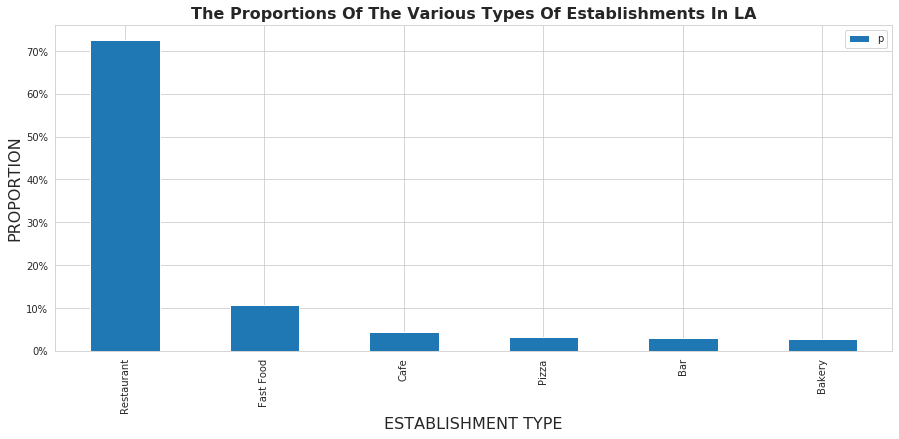

In [12]:
# Plotting a graph of object_type

# grouping by establishment type
type_data = rest_data['object_type'].value_counts()

# setting the style
sns.set_style('whitegrid')

# setting the size
fig,ax=plt.subplots(figsize=(15,6))

# plotting the graph 
ax = type_data.plot(kind='bar')

ax.set_title("The Proportions Of The Various Types Of Establishments In LA", fontsize=16, fontweight="bold")
ax.set_xlabel('ESTABLISHMENT TYPE', fontsize=16)
ax.set_ylabel('PROPORTION', fontsize=16)
# setting y axes as percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter(10000))
plt.legend('p')
plt.show()



### Conclusion - The proportions of the various types of establishments
- 7255 of the restaurants are proper restaurants, they are around 70% of all the restaurants on LA.
- 1066 of the restaurants are fast food establishments and are roughly 10% of the whole restaurants in LA.
- Cafe establishment, the type we want to open is around 5% of the total restaurants in LA comes in third with only 435 establishments.
- I'm assuming cafe establishments are not very popular comapre to restaurants and fast food, people in La rather make the coffee at home probably.
- It looks like the competition between Cafe establishments is smaller compared to the restaurants and fast food establishments, however maybe the amount of people going to Cafe establishments is lower and therefore not worth investing in.

### Investigate the proportions of chain and nonchain establishments<a class="anchor" id="chapter3"></a>

[Go back to the Table of Contents](#table_of_contents)


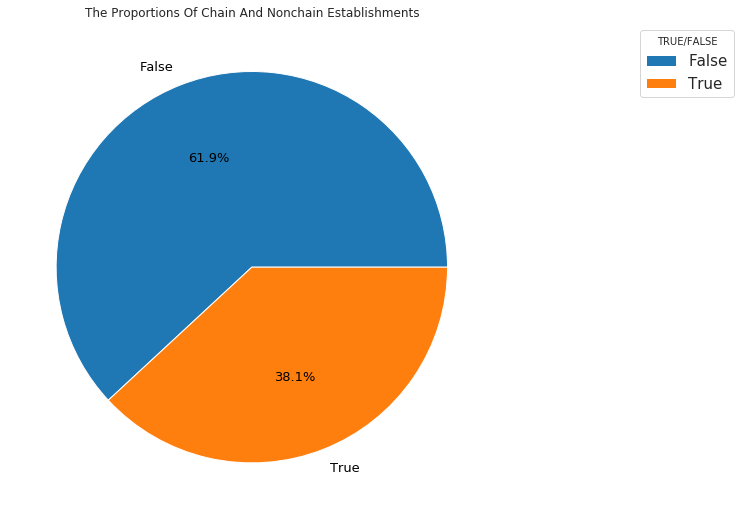

In [13]:
# slicing the data by chain column
chain_data = rest_data['chain'].value_counts().to_dict()
# plotting a pie chart
fig = plt.figure(figsize=(20,9))
ax = fig.add_subplot()
ax.pie(chain_data.values(),
    labels = chain_data.keys(),
    autopct = '%1.1f%%',
    textprops = {'fontsize' : 13, 'color': 'black'}
    )
ax.set_title('The Proportions Of Chain And Nonchain Establishments')
ax.legend(loc = 'upper right', bbox_to_anchor = (1, 0, 0.5, 1), fontsize = 15, title= "TRUE/FALSE");

### Conclusion - The proportions of chain and nonchain establishments

- Most of the restaurants (61.9%) are non-chain establishments, which means they are small businesses in the LA market, as opposed to 38.1% of the market that is a chain restaurant. 
- Having said that, it means that even with the power and presence of big corporation brands/ food companies, small businesses have their big share of the market and don't seem to be ruled/affected by restaurants that are under shared corporate ownership.
- That's good news for our decision to open a small Cafe establishment- however we need to check if our type of establishment is likely to be a chain or not.

### Which type of establishment is typically a chain? <a class="anchor" id="chapter4"></a>

[Go back to the Table of Contents](#table_of_contents)

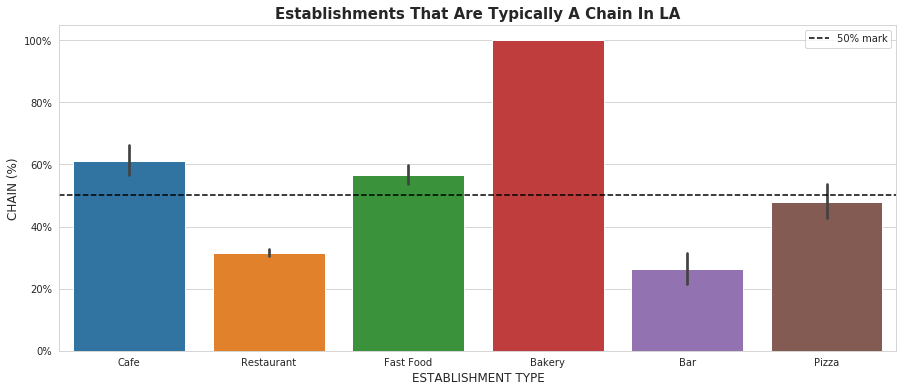

In [14]:
sns.set_style("whitegrid")

fig,ax=plt.subplots(figsize=(15,6))

sns.barplot(x="object_type", y="chain", data=rest_data)

ax.set_title("Establishments That Are Typically A Chain In LA", fontsize=15, fontweight="bold")
ax.set_xlabel('ESTABLISHMENT TYPE', fontsize=12)
ax.set_ylabel('CHAIN (%)', fontsize=12)

# adding the X axis
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.axhline(y=0.5, color='black', linestyle='--', label='50% mark') 
plt.legend()
plt.show()

### Conclusion - Which type of establishment is typically a chain?
- In order to see which type of establishment is typically a chain, I created a bar graph with establishment type as the x axes and the chain as the y and created an axhline that represents that 50% mark, which indicates that if there is an establishment type that crosses the line (50%) it is typically a chain in LA. 
- By examining the graph we can see that Fast food, Bakery and Cafe are establishments that crossed the 50% chain mark.
- which means these types have a higher chance to become a chain establishments.
- when it comes to our decision we have to keep in mind that Cafe are most likely to become a chain and not a small player/business.
- In the long term, if we don't want our place to become a chain establishment, it will be better to open a bar or restaurant.


### What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?<a class="anchor" id="chapter5"></a>

[Go back to the Table of Contents](#table_of_contents)

### First I want to plot a graph of number of seats in all establishments to see where's the line between lots of seats and small number of seats.
### I'll mark the median value to understand the distribution

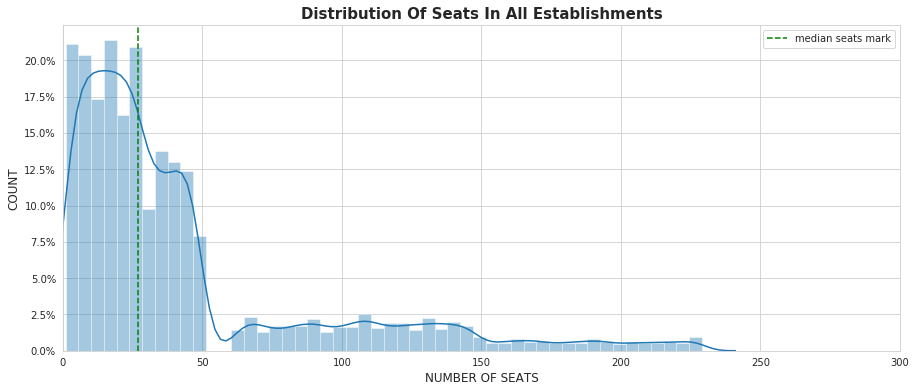

In [15]:
# Finding the median value of number of seats
median_seats = rest_data['number'].median()

sns.set_style("whitegrid")

fig,ax=plt.subplots(figsize=(15,6))

sns.distplot(rest_data['number']) 

ax.set_title("Distribution Of Seats In All Establishments", fontsize=15, fontweight="bold")
ax.set_xlabel('NUMBER OF SEATS', fontsize=12)
ax.set_ylabel('COUNT', fontsize=12)
ax.set(xlim=(0, 300))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(0.1))

# Marking median seats
plt.axvline(x=median_seats, color='green', linestyle='--', label='median seats mark') 
plt.legend()
plt.show()


- As we can see, there's a clear border/ line between establishments with small number of seats and large number of seats. 
- Based on this graph we can see that the line is around 50-60 seats. Below this number establishments considered to have small amount of seats and above that number are establishments with lots of seats.
- I will check the distribution of chain establishments by declaring that less than 50 seats are establishments with small number of seats and more than 50 seats are establishments with lots of seats.


In [16]:
# Slicing the data to show only chain establishments
chain_data = rest_data.query('chain== True')
chain_data = chain_data.groupby('number')['id'].agg('count').reset_index()

# Creating a function that separates the data into the two required groups
def seat_group(data):
    number = data['number']
    if number > 50:
        return 'many'
    else:
        return 'few'

chain_data['seat_group'] = chain_data.apply(seat_group, axis = 1)
chain_data.tail() #test


,number,id,seat_group
198,225,2,many
199,226,1,many
200,227,2,many
201,228,1,many
202,229,3,many


In [17]:
# plotting a distribution graph
fig = px.bar(chain_data, x='number', y='id',color='seat_group', title='Distribution Of Seats In Chain Establishments',labels={'number':'Number Of Seats', 'id':'COUNT (ESTABLISHMENTS)'})
fig.update_layout(width=800,height=500)
fig.show()

### Conclusion - What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?

- As we can see, after finding out what is considered as an establishments with a few number of seats (less than 50), there are more chain establishments with a few number of seats, and a small portion of chain establishments with many seats.
- most of the chain establishments are around the 1-50 seats area of the graph, while only few of them cross the 50 seats line.
- In conclusion, based on the graph, what characterizes chains is many establishments with a small number of seats.

### Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? <a class="anchor" id="chapter6"></a>

[Go back to the Table of Contents](#table_of_contents)

In [18]:
# Finding the average number of seats for each type of restaurant

avg_seats = rest_data.groupby('object_type')['number'].agg('mean').reset_index()
avg_seats.sort_values('number', ascending=False)

,object_type,number
5,Restaurant,48.042316
1,Bar,44.767123
3,Fast Food,31.837711
4,Pizza,28.459375
2,Cafe,25.000000
0,Bakery,21.773852


- Restaurants and bars have the greatest number of seats in average 

In [19]:
# Applying the seat_group function on the rest_data
rest_data['seat_group'] = rest_data.apply(seat_group, axis = 1)


# Finding the proportion of average seats in restaurant and bar establishment types 
print('Precentage of few and many average seats in restaurant and bar establishments')
print(rest_data.query("object_type in ['Restaurant','Bar']")['seat_group'].value_counts(
    normalize=True) * 100)

print('')

# Finding the proportion of average seats in the other establishment types 
print('Precentage of few and many average seats in other establishments')
rest_data.query("object_type not in ['Restaurant','Bar']")['seat_group'].value_counts(
    normalize=True) * 100


Precentage of few and many average seats in restaurant and bar establishments
few     76.175964
many    23.824036
Name: seat_group, dtype: float64

Precentage of few and many average seats in other establishments


few     90.922053
many     9.077947
Name: seat_group, dtype: float64

- 9% of the establishments that are not restaurant or bar have on average many seats, and 90% of them have on average low number of seats (less than 50 seats)
- 23% of restaurants and bars establishments have on average many seats, that's more than twice the poportion of the other establishments.
- 76% of restaurants and bars establishments have a low average of seats.
- Overall, we can see that regardless of the type of establishment and if it's chain or non chain establishments, most of the establishments have on average a small number of seats.

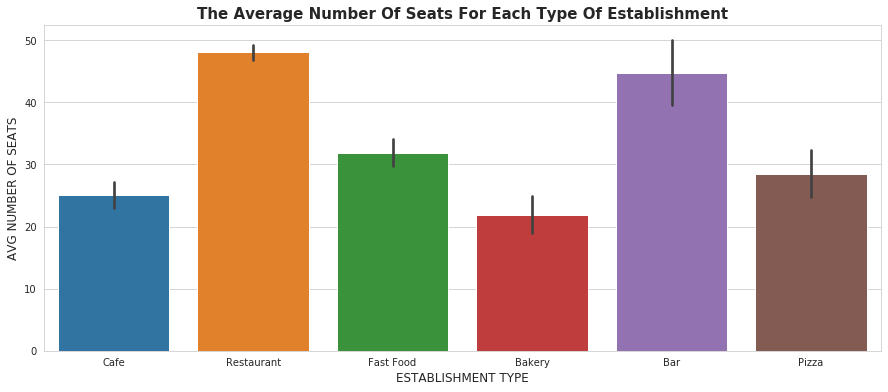

In [20]:
# plotting a bar graph 

sns.set_style("whitegrid")

fig,ax=plt.subplots(figsize=(15,6))
ax = sns.barplot(x="object_type", y="number", data=rest_data)
ax.set_title("The Average Number Of Seats For Each Type Of Establishment", fontsize=15, fontweight="bold")
ax.set_xlabel('ESTABLISHMENT TYPE', fontsize=12)
ax.set_ylabel('AVG NUMBER OF SEATS', fontsize=12)

plt.show()

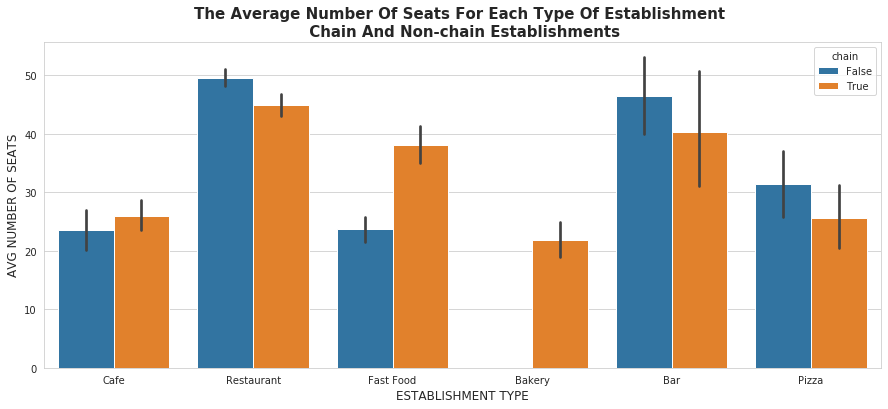

In [21]:
# plotting a bar graph 

sns.set_style("whitegrid")

fig,ax=plt.subplots(figsize=(15,6))
ax = sns.barplot(x="object_type", y="number", hue="chain", data=rest_data)
ax.set_title("The Average Number Of Seats For Each Type Of Establishment \n Chain And Non-chain Establishments", fontsize=15, fontweight="bold")
ax.set_xlabel('ESTABLISHMENT TYPE', fontsize=12)
ax.set_ylabel('AVG NUMBER OF SEATS', fontsize=12)

plt.show()

In [22]:
# exploring the non-chain bakery establishments due to the result on the graph

rest_data.loc[(rest_data['chain']== 'False') & (rest_data['object_type'] == 'Bakery')].count()

id             0
object_name    0
address        0
chain          0
object_type    0
number         0
seat_group     0
dtype: int64

- There are no Bakery establishments that are non-chain.

### Conclusion - Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? 

- As we can see the establishments that have the greatest number of seats are restaurants and bars.
- The establishments that have the lowest number of seats are cafe and bakery.
- 9% of the establishments that are not restaurant or bar have on average many seats, and 90% of them have on average low number of seats (less than 50 seats)
- 23% of restaurants and bars establishments have on average many seats, that's more than twice the poportion of the other establishments.
- 76% of restaurants and bars establishments have a low average of seats.
- Overall, we can see that regardless of the type of establishment and if it's chain or non chain establishments, most of the establishments have on average a malle number of seats.
- The graph above shows us the difference in the average number of seats between chain and non-chain restaurants.
- For both chain and non chain restaurants and bars are leading the greatest number of seats on average. 
- However, we can see that there's a big difference in the number of seats between chain and non-chain fast food establishments.
- Non-chain restaurants, bars and pizza (types that are less likely to become chain have more seats than chain establishments
- Non- chain bakery establishments don’t have seats. 
- Also, when it comes to bakery establishments, I've discovered that all the bakeries in LA are chain establishments, and therefore the graph only shows the average number of seats for chain bakery establishments.


- In conclusion, the establishments that have the greatest number of seats are restaurants and bars, regardless if it's a chain or non-chain establishments.
- When it comes to our purpose of opening a small robot-run cafe in Los Angeles, we can see that the average amount of seats in cafe establishments is low (25 seats), and therefore, the space and the number of robots/utilities are corealted to the average of seats, which means that the amount of money we will need to invest when it comes to the property size and the amount of utilities/services is low.

### Put the data on street names from the address column in a separate column. <a class="anchor" id="chapter7"></a>

[Go back to the Table of Contents](#table_of_contents)

#### When I first used usaddress tag method to seperate the street name from the full address, i came across KeyErrors - These errrors showed me that part of the street names were referring as "PlaceName" rather than StreetName, in order to solve that I created inside the function condition to fix that problem with every street name that registrated as PlaceName and not StreetName. The function takes the address and pass it through the tag function and then takes only the street name value from the address details
#### This is my final function: 

In [23]:
def street(raw):
    if raw.endswith('3RDFL'):
        street_name = '3425 E 1ST ST'
    elif raw.endswith('LOB#2'):
        street_name = '110 E 9TH ST ST B'
    elif raw.endswith('PLAZA 35'):
        street_name = 'GRAND AVENUE'
    elif raw.startswith('123 ASTRONAUT'):
        street_name = '123 ASTRONAUT E S ONIZUKA'
    elif raw.startswith('123 E ASTRONAUT'):
        street_name = '123 ASTRONAUT E S ONIZUKA'
    elif raw.startswith('OLVERA'):
        street_name = 'OLVERA, Los Angeles,USA'
    elif raw.startswith('1033 1/2 LOS ANGELES'):
        street_name = '1033 1/2 ANGELES ST, Los Angeles,USA'
    else:
        address = usaddress.tag(raw)
        street_name = str(address[0]['StreetName'])
    return street_name

In [24]:
# applying the function to the dataset and creating a new column to store the street names
rest_data['street_name'] = rest_data.address.apply(street)
rest_data

,id,object_name,address,chain,object_type,number,seat_group,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,few,EAGLE ROCK
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,few,WORLD
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,few,HOLLYWOOD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,few,SUNSET
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,few,ECHO PARK
...,...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,many,TEMPLE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,many,MELROSE
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,few,HOLLYWOOD
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,few,SPRING


### Plot a graph of the top ten streets by number of restaurants.<a class="anchor" id="chapter8"></a>

[Go back to the Table of Contents](#table_of_contents)

### Since our goal is to open a cafe, I will also include the top ten streets by cafe

In [25]:
# Counting the number of establishments for each street name 
streets_esta = rest_data['street_name'].value_counts()
top10_esta = streets_esta.head(10)
top10_esta

SUNSET          404
WILSHIRE        398
PICO            370
WESTERN         369
FIGUEROA        334
OLYMPIC         309
VERMONT         288
SANTA MONICA    264
3RD             263
HOLLYWOOD       253
Name: street_name, dtype: int64

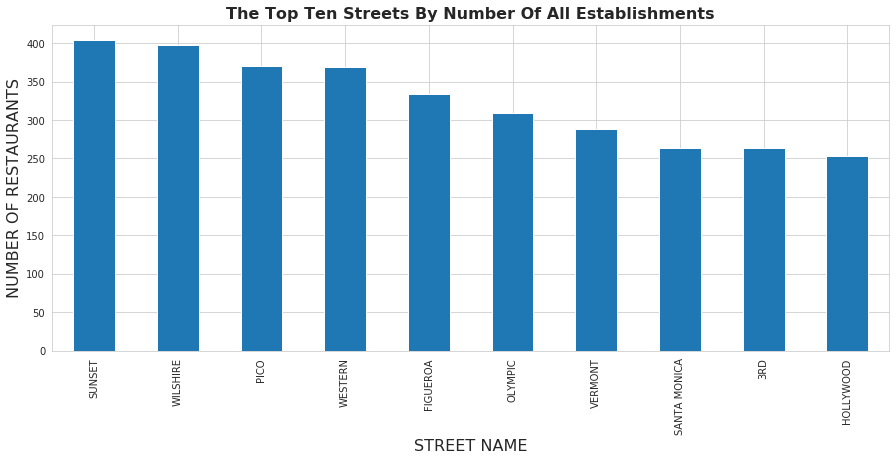

In [26]:
# setting the style
sns.set_style('whitegrid')

# setting the size
fig,ax=plt.subplots(figsize=(15,6))

# plotting the graph 
ax = top10_esta.plot(kind='bar')

ax.set_title("The Top Ten Streets By Number Of All Establishments", fontsize=16, fontweight="bold")
ax.set_xlabel('STREET NAME', fontsize=16)
ax.set_ylabel('NUMBER OF RESTAURANTS', fontsize=16)

plt.show()

In [27]:
# creating new dataset with only cafe establishments
cafes = rest_data.query('object_type == "Cafe"')
# Counting the number of restaurants for each street name 
streets_cafe = cafes['street_name'].value_counts()
top10_cafe = streets_cafe.head(10)
top10_cafe

SUNSET          28
WORLD           28
WILSHIRE        25
HOLLYWOOD       14
3RD             13
PICO            13
SANTA MONICA    12
WESTERN         12
OLYMPIC         11
BEVERLY         11
Name: street_name, dtype: int64

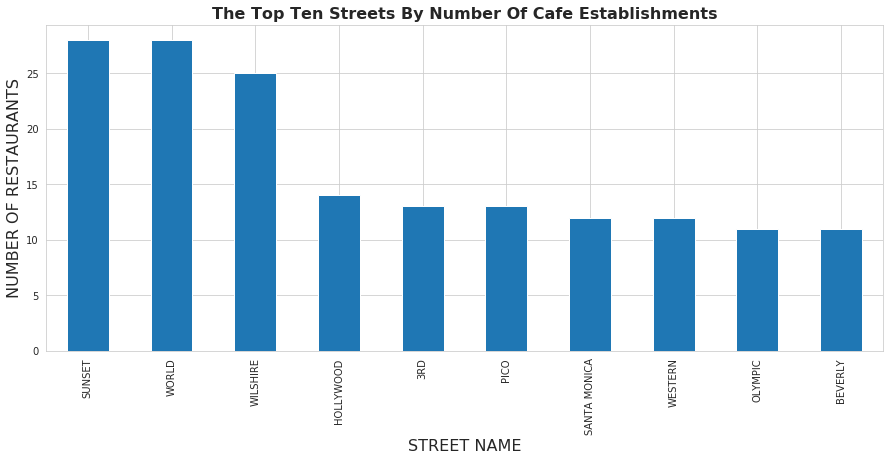

In [28]:
# setting the style
sns.set_style('whitegrid')

# setting the size
fig,ax=plt.subplots(figsize=(15,6))

# plotting the graph 
ax = top10_cafe.plot(kind='bar')

ax.set_title("The Top Ten Streets By Number Of Cafe Establishments", fontsize=16, fontweight="bold")
ax.set_xlabel('STREET NAME', fontsize=16)
ax.set_ylabel('NUMBER OF RESTAURANTS', fontsize=16)

plt.show()

### Conclusion - Plot a graph of the top ten streets by number of restaurants

- In the top ten streets by number of establishments, the most popular streets are SUNSET and WILSHIRE 
- In the top ten streets by number of cafes, the most popular streets are WORLD and SUNSET. 
- To all establishments and cafes in particular, the SUNSET street is a popular street, I'm assuming there's a big shopping center/mall or a restaurants center on the street, and also the other streets are tourist areas or shopping centers as well.
- Based on our purpose of opening a small cafe, and the findings of the top streets, we will have to consider if we want to open it in a place where there's no competition, none of the top streets or to establish it in a place that is more popular but has a lot of other cafes to compete with (top ten streets).

### Find the number of streets that only have one restaurant <a class="anchor" id="chapter9"></a>

[Go back to the Table of Contents](#table_of_contents)

#### Here, I prefer to take a look at all establishments and in particular cafe establishments
#### First, I want to find the number of all streets with establishments and cafe in general.

In [29]:
# Finding the number of all streets
all_esta_streets = streets_esta.count()
print("The number of all streets with establishments:",all_esta_streets)

all_cafe_streets = streets_cafe.count()
print("The number of all streets with cafes:",all_cafe_streets)

# Finding the number of streets that have only one establishment
one_esta_street = streets_esta[streets_esta == 1].count()
print("The number of streets that have only one establishment:",one_esta_street)

one_cafe_street = streets_cafe[streets_cafe == 1].count()
print("The number of streets that have only one cafe:",one_cafe_street)

# Calculating the ratio
ratio_esta = one_esta_street/all_esta_streets * 100
ratio_cafe = one_cafe_street/all_cafe_streets * 100

print("The ratio between one establishment streets and all streets with establishments:",int(ratio_esta),'%')
print("The ratio between one cafe streets and all streets with cafes:",int(ratio_cafe),'%')

The number of all streets with establishments: 491
The number of all streets with cafes: 118
The number of streets that have only one establishment: 203
The number of streets that have only one cafe: 47
The ratio between one establishment streets and all streets with establishments: 41 %
The ratio between one cafe streets and all streets with cafes: 39 %


- As we can see, 41% of all streets with establishments have only one establishment.(203 out of 491)
- 39%% of all streets with cafes have only only one cafe. (47 out of 118)
- We can see that most of the establishments are located in streets that don't have more estalishments to compete with, regardless if it's a cafe establishment or not. 
- Reffering to our purpose, It will be a wise decision to find a street without cafe establishment and establish it there, since it's common and again there will be no competition. However we don't quite know how successful cafe establishments that are the only ones on a sigle street rather than many on one street.

### For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?<a class="anchor" id="chapter10"></a>

[Go back to the Table of Contents](#table_of_contents)

#### First, I want to plot a distribution graph of number of establishments for every street to see what is consider as a street with a lot of establishments.

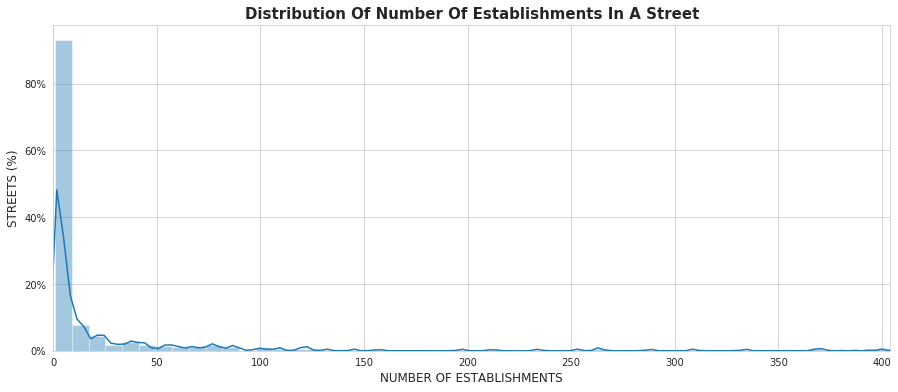

In [30]:
# plotting a distribution graph for all establishments

sns.set_style("whitegrid")

fig,ax=plt.subplots(figsize=(15,6))

sns.distplot(streets_esta) 

ax.set_title("Distribution Of Number Of Establishments In A Street", fontsize=15, fontweight="bold")
ax.set_xlabel('NUMBER OF ESTABLISHMENTS', fontsize=12)
ax.set_ylabel('STREETS (%)', fontsize=12)
ax.set(xlim=(0, 404))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(0.1))

plt.show()

- As we can see, by plotting the distribution graph, most of the streets have around 1-10 establishments. more than 80 % of the streets have around 1-5 restaurants.
- After crossing the 50 value, we can see that there are less and less streets with more establishments.
- I will declare the line of 50 as the border, which means streets with more than 50 establishments consider to be street with MANY establishments.

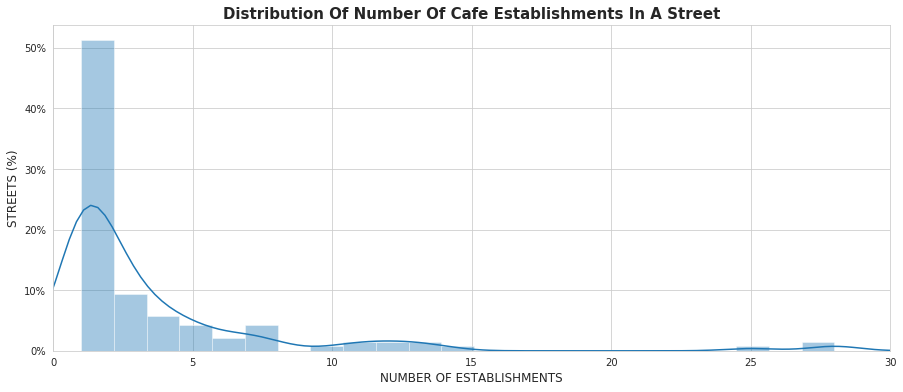

In [31]:
# plotting a distribution graph for cafe establishments

sns.set_style("whitegrid")

fig,ax=plt.subplots(figsize=(15,6))

sns.distplot(streets_cafe) 

ax.set_title("Distribution Of Number Of Cafe Establishments In A Street", fontsize=15, fontweight="bold")
ax.set_xlabel('NUMBER OF ESTABLISHMENTS', fontsize=12)
ax.set_ylabel('STREETS (%)', fontsize=12)
ax.set(xlim=(0, 30))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.show()

- As we can see, by plotting the distribution graph for cafe establishments, most of the streets have around 1-5 cafe establishments. more than 50% of the streets have 2 cafe establishments.
- After crossing the 7 value, we can see that there are less and less streets with more cafe establishments.
- I will declare the line of 7 as the border, which means streets with more than 7 cafe establishments consider to be street with MANY cafe establishments.

#### Now that I found what is a street with many estalishments, I will create a new dataset with establishments that are in streets with many establishments and create a graph to display the number of seats for establishments on these streets

In [32]:
# Creating a dataset of streets with many establishments

many_esta = streets_esta[streets_esta > 50].reset_index()
many_esta = many_esta['index']
many_esta

# Slicing the data according to the street names that appear on the dataset above
many_esta_street = rest_data.query('street_name in @many_esta')
many_esta_seat = many_esta_street.groupby('number')['id'].agg('count').reset_index()
many_esta_seat.head()

,number,id
0,1,140
1,2,117
2,3,133
3,4,126
4,5,142


In [33]:
# plotting a distribution graph
fig = px.bar(many_esta_seat, x='number', y='id', title='Distribution Of Seats on Establishments That Located In Popular Streets',labels={'number':'Number Of Seats', 'id':'COUNT (ESTABLISHMENTS)'})
fig.update_layout(width=800,height=500)
fig.show()

In [34]:
# Creating a dataset of streets with many cafe establishments
many_cafe = streets_cafe[streets_cafe > 7].reset_index()
many_cafe = many_cafe['index']
many_cafe

# Slicing the data according to the street names that appear on the dataset above
many_cafe_street = rest_data.query('street_name in @many_cafe and object_type == "Cafe"')
many_cafe_seat = many_cafe_street.groupby('number')['id'].agg('count').reset_index()
many_cafe_seat.head()

,number,id
0,1,2
1,2,4
2,3,6
3,4,6
4,5,5


In [35]:
# plotting a distribution graph
fig = px.bar(many_cafe_seat, x='number', y='id', title='Distribution Of Seats on Cafe Establishments That Located In Popular Streets',labels={'number':'Number Of Seats', 'id':'COUNT (ESTABLISHMENTS)'})
fig.update_layout(width=800,height=500)
fig.show()

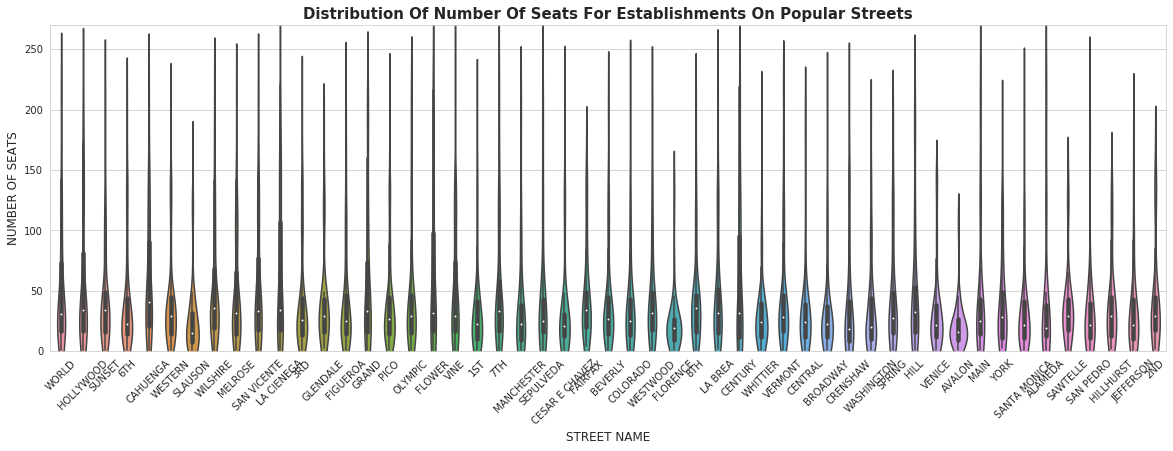

In [36]:
# plotting a distribution graph for cafe establishments

sns.set_style("whitegrid")

fig,ax=plt.subplots(figsize=(20,6))
plt.xticks(rotation=45)
plt.ylim(0,270)
sns.catplot(x="street_name", y="number",kind='violin',height=16, data=many_esta_street, edgecolor='.6',ax=ax)
plt.close(2)
ax.set_title("Distribution Of Number Of Seats For Establishments On Popular Streets", fontsize=15, fontweight="bold")
ax.set_xlabel('STREET NAME', fontsize=12)
ax.set_ylabel('NUMBER OF SEATS', fontsize=12)

plt.show()

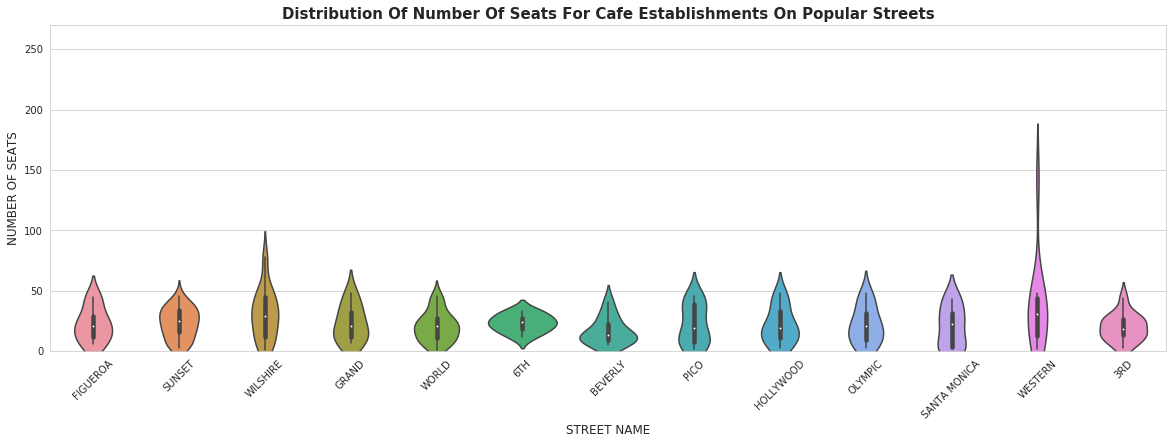

In [37]:
# plotting a distribution graph for cafe establishments

sns.set_style("whitegrid")

fig,ax=plt.subplots(figsize=(20,6))
plt.xticks(rotation=45)
plt.ylim(0,270)
sns.catplot(x="street_name", y="number",kind='violin',height=16, data=many_cafe_street, edgecolor='.6',ax=ax)
plt.close(2)
ax.set_title("Distribution Of Number Of Seats For Cafe Establishments On Popular Streets", fontsize=15, fontweight="bold")
ax.set_xlabel('STREET NAME', fontsize=12)
ax.set_ylabel('NUMBER OF SEATS', fontsize=12)
plt.show()

### Conclusion -  For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?

- After finding what is consider a popular street that has many estalishments and creating the graphs to display the number of seats for establishments, Here are my conclusions:
    - For both graphs, all establishments and only cafe establishment, we can see that the number of seats for all establishments is very similar. 
    - For all establishment types, on those popular streets, the most common number of seats are no more than 50 seats for establishment.
    - Also most cafe establishments have the same number of seats not more than 50 seats. 
    - In general, most of the establishments on these popular streets, wether there are cafe types or not have less 50 seats, likely around 25-35 seats.
    - We can clearly see it in the violin graphs that showing the proportion of seats for establishments based on the popular streets, most of them don't cross the 50 seats.
   
- In conclusion, the trends are that establishments that located at popular streets have a similar amount of seats, they have no more than 50 seats, approximately around 30 seats.

### Final Conclusion:
<a class="anchor" id="chapter11"></a>

[Go back to the Table of Contents](#table_of_contents)

- My purpose was to do market research on restaurants in LA, in consideration of our goal to open a small robot-run cafe in Los Angeles. 
- Based on my analysis, Here are my **conclusions**:
    - Most of the establishments in LA are restaurants (70%). Second are fast food establishments with 10% of the market.
    - Cafe establishments, the type we want to open is around 5% of the total establishments in LA.
    - Based on the dataset, Cafe establishments are not very common/popular in LA area.
    - Most of the restaurants (61.9%) are non-chain establishments, which means they are small businesses in the LA market, as opposed to 38.1% of the market that is a chain restaurant.
    - Fast food, Bakery, and Cafe are establishments are most likely to become chain establishments.
    - Chain establishments are characterized as many establishments with a small number of seats.
    - Most of the establishments have on average a small number of seats.
    - There's a big difference in the number of seats between chain and non-chain fast food establishments.
    - Non-chain restaurants, bars and pizza (types that are less likely to become chain have more seats than chain establishments
    -  the establishments that have the greatest number of seats are restaurants and bars, regardless if it's a chain or non-chain establishments.
    - To all establishments and cafes, in particular, SUNSET street is a popular street.
    - 41% of all streets with establishments have only one establishment. (203 out of 491)
    - 39%% of all streets with cafes have only one cafe. (47 out of 118)
    - Most establishments that located on popular streets have a similar amount of seats, they have no more than 50 seats, approximately around 30 seats.
    
**Recommendation:**
- As it appears in the graph, cafes are less popular than restaurants and fast food establishments, Therefore I recommend not open a cafe.
- Even though, Most of the establishments are not chain restaurants, Cafe establishments tend to become a part of chain ownership, therefore as it seems, consideration of becoming a chain cafe establishments is needed. 
- If you're considering opening a cafe under corporate ownership (chain establishment), I recommend giving a second thought to the idea of a robot-run cafe, cause the chain establishments are characterized by a small number of seats and the idea of a robot-run cafe is very expensive but might be worthless due to the number of consumers that will actually sit in the cafe and enjoy this kind of service. 
- Overall, all establishments in LA have a small number of seats, and therefore, I highly recommend not to invest money in robot run services.
- Based on the data, SUNSET street is very popular and therefore, I recommend considering opening the cafe there cause it seems like there's a shopping center or a restaurants area that attract a lot of people, however, there's also a possibility of tough competition between other establishments, especially chain type.
- If you're considering opening a cafe on a popular street, keep in mind that in all of these streets the number of seats is low.

- In conclusion, my recommendation, based on the data I was given is to not invest in opening a robot-run cafe establishment, due to the lack of popularity, the small number of seats on average, and the chances of it becoming a chain establishment. 
